<a href="https://colab.research.google.com/github/vinitp1402/Student_Retention_Model/blob/master/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### Import the csv file exported from Retention_Model_1.ipynb

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#model_ds = pd.read_csv("drive/My Drive/model_3.csv")
model_ds = pd.read_csv("model_wide.csv")

In [0]:
#model_ds = model_ds.drop(columns=['Unnamed: 0'])
model_ds = model_ds.dropna()

## Select features and labels

In [0]:
feat = model_ds.drop(columns=['Unnamed: 0','Retained', 'Student_No'],axis=1)
label = model_ds[["Retained"]]

In [20]:
model_ds.isna().sum()

Unnamed: 0                                0
Enrolment_Year                            0
Student_No                                0
SFS                                       0
SFT                                       0
NPS                                       0
Course_Uniq                               0
Course_Loc_Uniq                           0
Subjects_Uniq                             0
No of Years                               0
Retained                                  0
Subjects_Repeated                         0
School_School 1                           0
School_School 10                          0
School_School 11                          0
School_School 12                          0
School_School 13                          0
School_School 14                          0
School_School 2                           0
School_School 3                           0
School_School 4                           0
School_School 5                           0
School_School 6                 

# Jump to ROC Curve

In [0]:
X_train, y_train, X_test, y_test = train_test_split(feat, label, test_size=0.3, random_state=1)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(109535, 41)
(46944, 41)
(109535, 1)
(46944, 1)


In [29]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

X_train_sc = sc_x.fit_transform(X_train)
#No need to scale target variables x_test = sc_x.fit_transform(x_test)
#scalar model is fitted , only transform the target variables
y_train_sc = sc_x.transform(y_train)
#Same logic y_test = sc_x.fit_transform(y_test)

#Import Random Forest Model and accuracy metric libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#Hyperparamters tuning using grid search a.k.a check every combiantion and 
#choose the most appropriate variable

n_estimators = [100] #, 300, 500, 800, 1200]
max_depth = [10]# , 8, 15] #, 25, 30]
min_samples_split = [2]#, 10, 15, 100]
min_samples_leaf = [1]#, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

#Create a Gaussian Classifier
forest = RandomForestClassifier(random_state = 1)

#Initialise the grid search
gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)


#clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets 
#clf.fit(x_train_sc,x_test)
bestF = gridF.fit(X_train_sc, X_test)

clf=RandomForestClassifier()
clf.set_params(**bestF.best_params_)

clf.fit(X_train_sc, X_test)

print("Initialising predictions...")
y_pred=clf.predict(y_train_sc)

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(y_test, y_pred)

print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_test, y_pred) )
print('Report : ')
print(classification_report(y_test, y_pred)) 

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Initialising predictions...
Confusion Matrix :
[[10748  7782]
 [  575 27839]]
Accuracy Score : 0.8219793796864349
Report : 
              precision    recall  f1-score   support

           0       0.95      0.58      0.72     18530
           1       0.78      0.98      0.87     28414

    accuracy                           0.82     46944
   macro avg       0.87      0.78      0.79     46944
weighted avg       0.85      0.82      0.81     46944



In [30]:
#pred_results =  
y_train['Retained']=y_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
y_train.head()

,Enrolment_Year,SFS,SFT,NPS,Course_Uniq,Course_Loc_Uniq,Subjects_Uniq,No of Years,Subjects_Repeated,School_School 1,School_School 10,School_School 11,School_School 12,School_School 13,School_School 14,School_School 2,School_School 3,School_School 4,School_School 5,School_School 6,School_School 7,School_School 8,School_School 9,ATAR_Band_40.00 - 49.95,ATAR_Band_50.00 - 59.95,ATAR_Band_60.00 - 69.95,ATAR_Band_70.00 - 79.95,ATAR_Band_80.00 - 89.95,ATAR_Band_90.00 - 99.95,ATAR_Band_NA,Age_Group 1,Age_Group 2,Age_Group 3,Age_Group 4,Age_Group 5,Age_Group 6,Age_Group 7,Age_NA,Course_Category_Group_Postgraduate Cwk,Course_Category_Group_Research,Course_Category_Group_Undergraduate,Retained
93045,2017,7.250000,7.750000,5.375000,1,1,7,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
18312,2015,9.571429,6.285714,5.428571,1,1,7,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
147896,2018,9.333333,7.000000,5.666667,1,1,3,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
114180,2017,7.857143,6.714286,6.142857,1,1,7,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
12717,2015,9.000000,6.750000,6.750000,1,1,8,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [0]:
y_train.to_csv('model_4_pred.csv')

# Creating ROC Curve

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [0]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [0]:
probs = clf.predict_proba(y_train)

In [40]:
probs

array([[0.34553458, 0.65446542],
       [0.3113794 , 0.6886206 ],
       [0.30025082, 0.69974918],
       ...,
       [0.32806536, 0.67193464],
       [0.32806536, 0.67193464],
       [0.34426513, 0.65573487]])

In [0]:
probs = probs[:, 1]

In [43]:
auc = roc_auc_score(y_test, probs)
print('n_estimators=', n_estimators, ', max_depht=' , max_depth, ' AUC: %.2f' % auc)

n_estimators= [100] , max_depht= [10]  AUC: 0.69


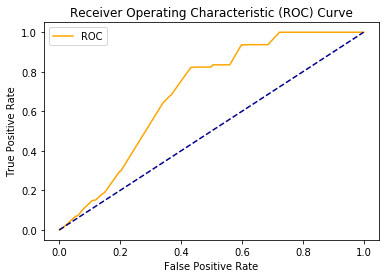

n_estimators= [100] , max_depht= [10]  AUC: 0.69


In [48]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print('n_estimators=', n_estimators, ', max_depht=' , max_depth, ' AUC: %.2f' % auc)